In [3]:
#In this project, I will conduct a a short hypothesis test using using the Numpy module and Data8 in Python.
#The data set I will use is the "titanic.csv" data set from https://www.kaggle.com/competitions/titanic-dataset
#Matplotlib is used loosely.

In [88]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datascience import *

In [51]:
#Below we have our data that we will use
titanic=Table.read_table('titanic_train.csv')
titanic

passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
1216,3,"Smyth, Miss. Julia",female,nan,0,0,335432,7.7333,nan,Q,13,nan,nan,1
699,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.6625,nan,S,nan,nan,Croatia,0
1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)",female,30,1,1,345773,24.15,nan,S,nan,nan,nan,0
449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,1,3,29105,23,nan,S,4,nan,"Cornwall / Akron, OH",1
576,2,"Veal, Mr. James",male,40,0,0,28221,13,nan,S,nan,nan,"Barre, Co Washington, VT",0
1083,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.525,nan,S,nan,173,nan,0
898,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,nan,S,nan,nan,nan,0
560,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13,nan,S,10,nan,"Finland / Washington, DC",1
1079,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.775,nan,S,C,nan,nan,1
908,3,"Jussila, Miss. Mari Aina",female,21,1,0,4137,9.825,nan,S,nan,nan,nan,0


In [46]:
#For this project, my interest was in the ages of the titanic passengers, both alive and dead
#We set another table for those that survived
survive=titanic.where('survived',1)
survive

passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
1216,3,"Smyth, Miss. Julia",female,nan,0,0,335432,7.7333,nan,Q,13,nan,nan,1
449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,1,3,29105,23,nan,S,4,nan,"Cornwall / Akron, OH",1
560,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13,nan,S,10,nan,"Finland / Washington, DC",1
1079,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.775,nan,S,C,nan,nan,1
43,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.2917,D15,C,8,nan,"Philadelphia, PA",1
233,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,7,nan,"Mt Airy, Philadelphia, PA",1
446,2,"Hocking, Miss. Ellen ""Nellie""",female,20,2,1,29105,23,nan,S,4,nan,"Cornwall / Akron, OH",1
1003,3,"McCoy, Mr. Bernard",male,nan,2,0,367226,23.25,nan,Q,16,nan,nan,1
36,1,"Bowerman, Miss. Elsie Edith",female,22,0,1,113505,55,E33,S,6,nan,"St Leonards-on-Sea, England Ohio",1
1088,3,"Olsson, Mr. Oscar Wilhelm",male,32,0,0,347079,7.775,nan,S,A,nan,nan,1


In [54]:
#I decided to see the survival rate by age, using a function. This function has two inputs and returns the survival rate
#between these two ages
def survive_age(num1,num2):
    "Returns the survival rate between two values chosen. For example, if ages 0 and 4 are chosen, it will provide"
    "the survival rate of people ages 0 to 4, but not including 4."
    agerange=survive.where('age',are.between(num1,num2)).num_rows
    agerange_surv=titanic.where('age',are.between(num1,num2)).num_rows
    try: 
        return (agerange/agerange_surv)*100 
    except ZeroDivisionError: 
        return 0 

In [69]:
#I made a table using this and a couple of ranges to see the survival rate. The ages will be incremented by 5
zero_to_seventyfive=np.arange(0,81,5)
five_to_eightyone=np.arange(5,86,5)
agerangelist=list(map(survive_age,zero_to_seventyfive,five_to_eightyone))
agesurvive=Table().with_columns('From Age',np.arange(0,85,5),'Survival Percent',agerangelist).show(20)
agesurvive

#The table below shows the start of the range. For example, the first row starts at 0 and goes all the way to 
#the next row, 5. Basically, it is the survival percent from 0 to <5 (i.e. 4.9999999)

From Age,Survival Percent
0,62.8571
5,61.9048
10,42.8571
15,33.3333
20,35.0877
25,30.1887
30,43.1818
35,46.875
40,22.8571
45,43.2432


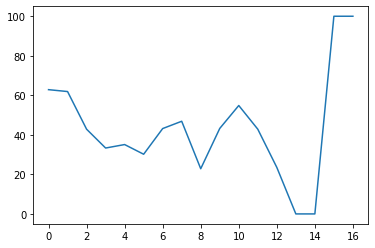

In [95]:
#Graph to show distribution
plt.plot(agerangelist)

<BarContainer object of 17 artists>

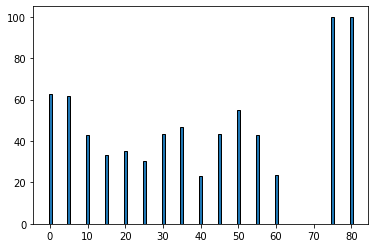

In [103]:
plt.bar(np.arange(0,85,5),agerangelist)

In [ ]:
#Some notes on the work done so far:

#I think checking the survival rate based on one's age is a poor way to check. For example, we are told that a person who
# is 80 years old to 85 years old has a 100% chance of survival. However, were we to look at the dataset, we see there is 
# only one person who is in that age range. I don't think its fair now to assume that had there been twenty 80 year olds,
# given the 100% chance survival rate, all of them would survive. Hence, this is ignored.

In [139]:
#Still dealing with age, next I decided to look at the averages. Due to not all ages being recorded, we disregard these
#and make a new table without these
titanics=titanic.sort('age').take(np.arange(0,676,1))
titanics_grouped=titanics.group('survived',np.average).select('survived','age average')
titanics_grouped

survived,age average
0,30.0201
1,28.7487


C:\Users\abdul\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


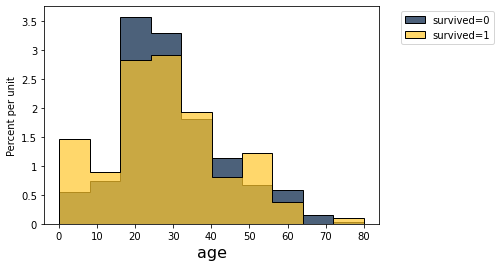

In [143]:
#Distribution of ages seems to be lower for those who survived
titanics.hist('age', group = 'survived')

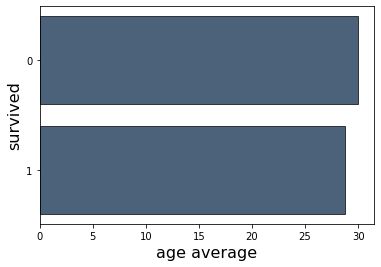

In [136]:
titanics_grouped.barh('survived','age average')

In [ ]:
#Its clear that the average age of those that survived was lower than those who died, although this difference is very small
#Now I decided to use this information to conduct the following hypothesis

#Null Hypothesis:The age distribution of those who survived is lower, on average, than those who died on the titanic
#Alternative Hypothesis: The age distrubition being different is merely by chance. There is no difference between the averages
#Test Statistic: Difference between the average age of those who survived and those who died

#Method used: A/B Testing, a randomized controlled test

In [218]:
#First: I defined a function that returns the test statistic given a table

def tested(tbl):
    groupedtbl=tbl.group('survived',np.average).select('survived','age average')
    return (groupedtbl.column(1).item(1)-groupedtbl.column(1).item(0))
tested(titanics)

-1.2713749587383099

In [219]:
test_stat=1.2713749587383099

In [220]:
#Next I defined a function that performs a random permutation. This is done because via the hypothesis, shuffling the ages 
# of the titanics table should result in those who survived having a lower age distribution than those who died.
#This is done by sampling without replacement the survived column and shuffling the survived column, and then
# getting the test statistic

def permutation():
    lbl=titanics.sample(with_replacement=False).column('survived')
    lbltbl=titanics.with_column('shuffled',lbl).drop('survived')
    final=lbltbl.relabeled('shuffled','survived')
    return tested(final)
permutation()

1.2389869301302063

In [221]:
make_array

<function datascience.util.make_array(*elements)>

In [222]:
#Now we will simulate the above function 3,000 times to get as many results as possible

titanic_array=np.array([])
simulation=3000
for i in np.arange(simulation):
    titanic_array=np.append(titanic_array,permutation())
titanic_array

array([ 0.8960065 , -1.44699673,  1.10210406, ..., -1.30340035,
       -1.25846178, -1.67065691])

In [231]:
#Lastly we get the result to see if we were correct by finding our P-Value

empvalue=np.count_nonzero(titanic_array <= test_stat) / simulation
empvalue

0.8693333333333333

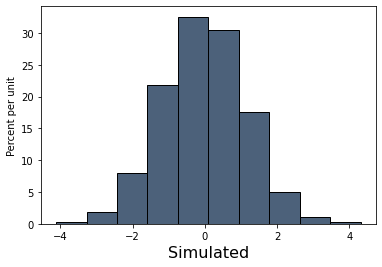

In [228]:
#Histogram showing the distribution

Table().with_columns('Simulated',titanic_array).hist()

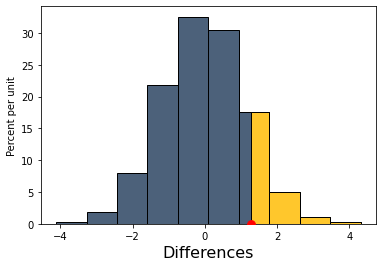

In [226]:
#Prediction under the null with P-Value present

Table().with_column('Differences',titanic_array).hist(left_end=test_stat) 
plt.scatter(test_stat,0,color='red',s=60,zorder=10)

In [ ]:
#Conclusion

#P-Value: Our P-value came out to be 0.869333333. Using a P-Value Cutoff of 0.05 (5%), this is much larger and therefore
# it is not statistically significant. This means we fail to reject the null hypothesis. This means that the statement
# "The age distribution of those who survived is lower, on average, than those who died on the titanic" may be true.

#Histogram:The first histogram is shown to be relatively uniformly distributed. 

#Permutation Histogram: The second histogram clearly shows the test statistic is not in the rejection region and therefore 
# we fail to reject the null, so it may be true that the age distribution of those who survived on the titanic on average is 
# lower than those who died on the titanic.